# Modelos predictivos con simulaciones en Python
dmeza.py@gmail.com

Recurso didáctico para cursos de estadística, analítica de datos y *machine learning*. Elaborado por Diego Bernardo Meza Bogado (2025-05-21). Licencia MIT.



## Presentación

Este documento tiene por objeto servir como guía práctica y autocontenida para **simular datos** y **entrenar tres modelos predictivos clásicos**:

1. Regresión lineal (variable respuesta continua).
2. Regresión logística (clasificación binaria).
3. Agrupamiento *K-means* (clustering no supervisado).

Cada módulo incluye:

* un breve recordatorio teórico;
* la generación paso a paso de datos sintéticos reproducibles;
* la explicación del código Python;
* la interpretación de los resultados y visualizaciones.

El material está pensado como un *notebook* Markdown - compatible con Jupyter Lab/VS Code - para que otros colegas puedan clonarlo desde GitHub y ejecutar inmediatamente las simulaciones.

> **Requisitos**
> Python ≥ 3.9
> `numpy ≥ 1.26`, `scikit-learn ≥ 1.4`, `matplotlib ≥ 3.9`.
> Instalar con:
>
> ```bash
> pip install numpy scikit-learn matplotlib
> ```



---

## Metodología general

1. **Fijar la semilla aleatoria** (`np.random.seed`) para garantizar reproducibilidad.
2. **Simular** las variables predictoras ($X$) y la variable respuesta ($y$) de acuerdo con el modelo teórico.
3. **Especificar y entrenar** el modelo correspondiente con `scikit-learn`.
4. **Extraer parámetros o métricas clave** (coeficientes, exactitud, centros de clúster, etc.).
5. **Visualizar** los datos y la solución aprendida para una interpretación intuitiva.
6. **Reflexionar** sobre la concordancia entre los parámetros verdaderos y los estimados, así como sobre las limitaciones del enfoque empleado.

> Todos los bloques de código están encapsulados en funciones para separar lógica y facilitar la reutilización.

---

## 1 · Regresión lineal

### 1.1 Recordatorio teórico breve

La regresión lineal ordinaria busca estimar los parámetros $\beta_0,\beta_1$ que minimizan la suma de errores cuadráticos entre los valores observados $y_i$ y las predicciones $\hat y_i=\beta_0+\beta_1 x_i$. Bajo los supuestos clásicos (linealidad, homocedasticidad, independencia y normalidad de errores) los estimadores son insesgados y de varianza mínima.

### 1.2 Simulación y ajuste del modelo



Pendiente estimada  : 3.069  (verdadera = 3)
Intercepto estimado : 3.925  (verdadero  = 4)


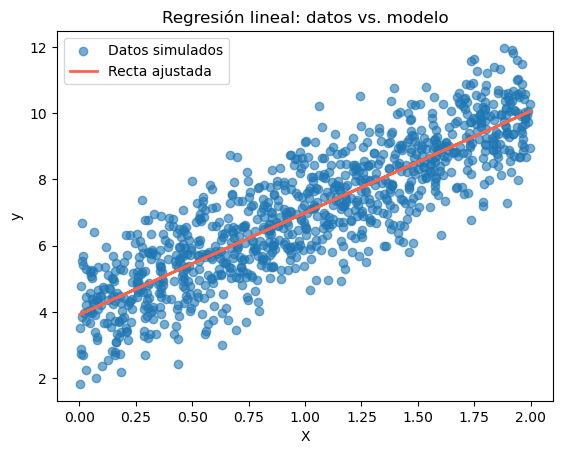

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# --- parámetros globales ---
RANDOM_STATE = 123
N_SAMPLES = 1_000
BETA_0 = 4     # intercepto real
BETA_1 = 3     # pendiente real
SIGMA = 1.0    # desviación estándar del error


def simulate_linear_data(n=N_SAMPLES, beta_0=BETA_0, beta_1=BETA_1, sigma=SIGMA, seed=RANDOM_STATE):
    """Genera (X, y) con y = beta_0 + beta_1 * X + N(0, sigma²)."""
    rng = np.random.default_rng(seed)
    X = 2 * rng.random((n, 1))          # X ∈ [0, 2)
    noise = rng.normal(0, sigma, size=(n, 1))
    y = beta_0 + beta_1 * X + noise
    return X, y


def run_linear_regression():
    # 1. Simular datos
    X, y = simulate_linear_data()

    # 2. Ajustar modelo
    linreg = LinearRegression()
    linreg.fit(X, y)

    # 3. Reportar parámetros
    print(f"Pendiente estimada  : {linreg.coef_[0,0]:.3f}  (verdadera = {BETA_1})")
    print(f"Intercepto estimado : {linreg.intercept_[0]:.3f}  (verdadero  = {BETA_0})")

    # 4. Visualizar
    y_pred = linreg.predict(X)
    plt.scatter(X, y, alpha=0.6, label="Datos simulados")
    plt.plot(X, y_pred, color="tomato", lw=2, label="Recta ajustada")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Regresión lineal: datos vs. modelo")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    run_linear_regression()
    


---

### 1.3 Interpretación de resultados

Al ejecutar el bloque anterior deberíamos observar coeficientes muy próximos a los valores verdaderos (3 y 4), pues los supuestos del modelo están correctamente especificados. El gráfico muestra los puntos dispersos alrededor de la recta de regresión, con variabilidad controlada por `SIGMA`.

---



## 2 · Regresión logística (clasificación binaria)

### 2.1 Fundamentos teóricos

Para $y\in\{0,1\}$, la **regresión logística** modela la probabilidad

$ \Pr(y=1\mid \mathbf x) = \frac{1}{1+e^{-\,(\beta_0+\boldsymbol{\beta}^\top \mathbf x)}}$

y se ajusta por máxima verosimilitud. La frontera de decisión donde $\Pr=0.5$ es lineal en el espacio de características.

### 2.2 Simulación y ajuste



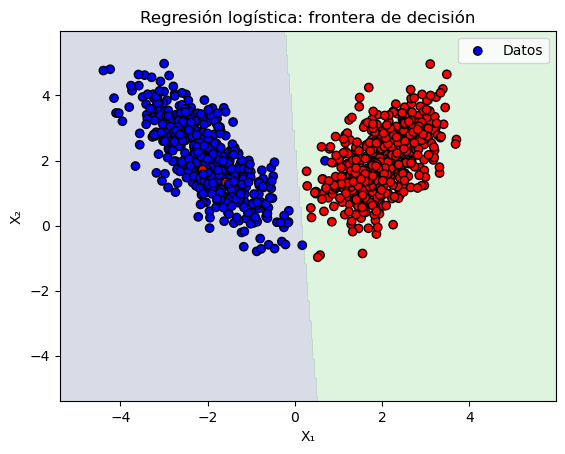

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

RANDOM_STATE = 0
N_SAMPLES = 1_000


def simulate_classification_data(n=N_SAMPLES, seed=RANDOM_STATE):
    """Dataset 2-D linealmente separable moderado."""
    X, y = make_classification(
        n_samples=n,
        n_features=2,
        n_redundant=0,
        n_clusters_per_class=1,
        class_sep=2.0,
        random_state=seed,
    )
    return X, y


def run_logistic_regression():
    X, y = simulate_classification_data()
    logreg = LogisticRegression()
    logreg.fit(X, y)

    # Malla para frontera de decisión
    grid = np.linspace(X.min() - 1, X.max() + 1, 300)
    xx, yy = np.meshgrid(grid, grid)
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # --- visualización ---
    plt.contourf(xx, yy, Z, alpha=0.2, levels=[-0.1, 0.5, 1.1])
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="bwr", label="Datos")
    plt.title("Regresión logística: frontera de decisión")
    plt.xlabel("X₁")
    plt.ylabel("X₂")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    run_logistic_regression()


---

### 2.3 Interpretación

La región sombreada indica la clasificación aprendida: un color por clase. Los puntos mal clasificados (si los hay) se ubican en la región contraria. Con la separación ajustada (`class_sep=2.0`) se espera una exactitud cercana al 100 %.

---

## 3 · Agrupamiento K-means

### 3.1 Contexto teórico

*K-means* es un algoritmo de partición que minimiza la suma de distancias cuadráticas entre cada observación y el centroide de su clúster. Requiere fijar $K$. Los centroides se actualizan iterativamente hasta converger.

### 3.2 Simulación, ajuste y visualización



c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


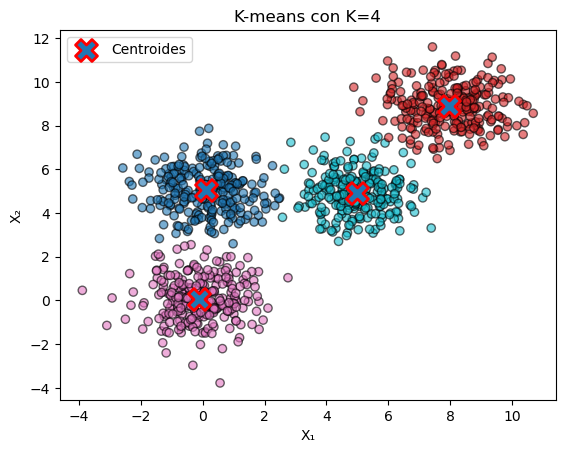

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

RANDOM_STATE = 0
CLUSTERS = np.array([(0, 0), (5, 5), (0, 5), (8, 9)])
POINTS_PER_CLUSTER = 250


def simulate_cluster_data(centers=CLUSTERS, n_per_cluster=POINTS_PER_CLUSTER, seed=RANDOM_STATE):
    rng = np.random.default_rng(seed)
    blobs = [rng.standard_normal((n_per_cluster, 2)) + shift for shift in centers]
    return np.vstack(blobs)


def run_kmeans():
    X = simulate_cluster_data()
    k = CLUSTERS.shape[0]
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init="auto")
    kmeans.fit(X)

    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    plt.scatter(X[:, 0], X[:, 1], c=labels, alpha=0.6, edgecolor="k", cmap="tab10")
    plt.scatter(centers[:, 0], centers[:, 1], marker="X", s=250, linewidths=2, edgecolor="r", label="Centroides")
    plt.title(f"K-means con K={k}")
    plt.xlabel("X₁")
    plt.ylabel("X₂")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    run_kmeans()




### 3.3 Interpretación

Los colores indican la asignación de cada punto a su clúster y las ✕ marcan los centroides finales. Cuando los grupos reales son compactos y bien separados, *K-means* recupera adecuadamente la estructura.

---



## Referencias básicas

* James, G. et al. (2021). *An Introduction to Statistical Learning* (2ª ed.). Springer.
* Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of Statistical Learning*.
* Géron, A. (2023). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* (3ª ed.). O’Reilly.

---
